<a href="https://colab.research.google.com/github/rshar95/QWalks-Software/blob/main/RichaThesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```

## Make sure to change runtime type to hardware accelerator for the boost in performance
```

**Figuring** out the transitions between Localization and Sub-ballistic behaviour of the Quantum Walks

In [1]:
## load cython module to convert python code to C
%load_ext Cython

The following code generates data and graph for Hierarchical Disorder in the Qunatum walks, the tuning parameter eps show the transition from sub-ballistic to localized behaviour of the walk

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  9.1min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  9.1min finished
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:  9.1min remaining:  9.1min
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  8.7min finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:

[array([0.        , 1.22474487, 1.60490367, 2.25837527, 2.7847097 ,
       3.23968546, 3.73032117, 4.25052228, 4.44241536, 4.97872135,
       5.3886481 , 5.31072832, 5.71613968, 6.01959488, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ]), array([0.        , 1.22474487, 1.63500562, 2.26986566, 2.86452669,
       3.75625208, 4.49943466, 5.148844  , 5.49738336, 6.09874868,
       6.59193584, 6.9472178 , 7.62056622, 8.21147205, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ]), array([ 0.        ,  1.22474487,  1.79148923,  3.12485001,  4.62433028,
        6.79569562,  9.45415023, 12.63549011, 15.91082841, 19.28138609,
       22.81072368, 26.86076612, 29.90037244, 32.51934756,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ]), array([  0.        ,   1.22474487,   1.81351758,   3.42743593,
         5.91061568,  10.20309496,  17.17659931,

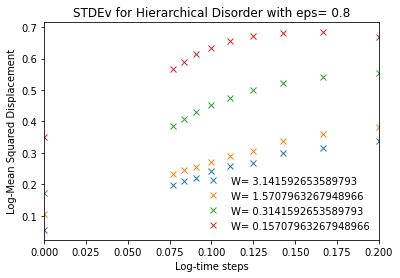

In [ ]:
%%cython
import numpy as np
from numpy import log2
import math
from math import log,pi,ceil,floor
import matplotlib.pyplot as plt
import cmath
from cmath import exp
from numpy import ones, zeros, sin, cos, array, roll, sqrt
import random
from random import uniform
import gc
from scipy import stats
from numba import jit,njit, prange,vectorize
import joblib
from joblib import Parallel, delayed
gc.collect()


def index(g, N):
    g=abs(g-N)
    if g % 2 == 1:return 0;
    if g % (2 ** 20) == 0:return 20;
    if g % (2 ** 19) == 0:return 19;
    if g % (2 ** 18) == 0:return 18;
    if g % (2 ** 17) == 0:return 17;
    if g % (2 ** 16) == 0:return 16;
    if g % (2 ** 15) == 0:return 15;
    if g % (2 ** 14) == 0:return 14;
    if g % (2 ** 13) == 0:return 13;
    if g % (2 ** 12) == 0:return 12;
    if g % (2 ** 11) == 0:return 11;
    if g % (2 ** 10) == 0:return 10;
    if g % (2 ** 9) == 0:return 9;
    if g % (2 ** 8) == 0:return 8;
    if g % (2 ** 7) == 0:return 7;
    if g % (2 ** 6) == 0:return 6;
    if g % (2 ** 5) == 0:return 5;
    if g % (2 ** 4) == 0:return 4;
    if g % (2 ** 3) == 0:return 3;
    if g % (2 ** 2) == 0:return 2;
    if g % (2) == 0:return 1;


#Hierarchical Disorder rotation
def rotation_1(N,eps, w):
  q = [pow(eps,index(g,N))*0.25*pi for g in range(2*N+1) ]
  hash_map = {}
  for g in range(21):
    hash_map[g] = exp(1j * uniform(-w, w) * pi)
  disorder =array([hash_map[index(g,N)] for g in range(2*N+1)])
  SIN = array([a*b for a,b in zip(sin(q),disorder)])  
  SINM = array([-a*b for a,b in zip(sin(q),disorder)])
  COS =array([a*b for a,b in zip(cos(q),disorder)])
  return array([[SIN, COS], 
                  [COS, SINM]])



def qw_split_avg(eps, w):
    
    N = 10_000
    a = 1 / sqrt(2.0)
    b = 1j / sqrt(2.0)
    avg_disorder = zeros(21)
    r1 = rotation_1(N,eps, w)
    psi = np.zeros((2, 2 * N + 1), dtype=complex)
    psi[0,N] = a
    psi[1, N] = b
    std_dev = np.zeros(N + 1,dtype=float)
    positions = np.arange(-N,N+1)
    #positions_sq = [i ** 2 for i in range(-N, N + 1)]
    pow_2 = [pow(2, i) for i in range(1, 21)]
    j = 0
    for n in range(1, N + 1):
        
      psi[:,N-n:N+n+1] = np.einsum("ijk,jk->ik", r1[:,:,N-n:N+n+1], psi[:,N-n:N+n+1], optimize="optimal")  # rotation theta1
      psi[0] = roll(psi[0], 1)  # shift up
      psi[1] = roll(psi[1], -1)  # shift down
      if n == pow_2[j]:
        psi_sq = abs(psi[0, N - n : N + n + 1]) ** 2 + abs(psi[1, N - n : N + n + 1]) ** 2
        sum_0 = np.sum([(a**2)* b for a, b in zip(positions[N - n : N + n + 1], psi_sq)])
        sum_1 = np.sum([(a * b) ** 2 for a, b in zip(positions[N - n : N + n + 1], psi_sq)])
        std_dev[n] = sqrt(sum_0 - sum_1)
        j += 1
        #Make sure to change the denominator corresponding to number of averaging iterations
        avg_disorder[j] += std_dev[n]/50
    return avg_disorder

##Parellizing the averaging using joblib library
def qw_split(eps,w):
  with joblib.parallel_backend(backend="threading"):
      parallel = Parallel(verbose=5)
      standard_dev= np.sum(parallel([delayed(qw_split_avg)(eps, w) for k in range(50)]),axis=0)
      return standard_dev

def main():
   
    W = [pi,0.5*pi,0.1*pi, 0.05*pi]
    #change tuning parameter to observe different behaviors of the walks
    eps=0.8
    with joblib.parallel_backend(backend="threading"):
      parallel = Parallel(verbose=5)
      standard_dev= (parallel([delayed(qw_split)(eps, j) for j in W]))
    print(standard_dev)     
    for j in range(4):
      log_std=[]
      n=0
      for i in standard_dev[j]:

        if i != 0:
          n+=1
          log_std.append(log(i, 2)/n)
        if i==0:
          log_std.append(0)

      log_scale =[1/i for i in range(1,14)]
      log_scale =[0]+log_scale        
      res = np.polyfit(log_scale[10:14] ,log_std[10:14],1)
      log_std[0] = res[1]
      print("Intercept for W = "+str(W[j])+" ="+str(res[1]))
      fig2 = plt.figure(2)
      ax2 = fig2.add_subplot(111)
      plot2 = plt.figure(2)
      ax2.plot(log_scale,log_std[0:14], "x", label="W= " + str(W[j]))
      ax2.legend(loc="lower right", frameon=False)
      plt.xlabel("Log-time steps")
      plt.ylabel("Log-Mean Squared Displacement")
      plt.title("STDEv for Hierarchical Disorder with eps= "+str(eps))
      plt.xlim(0, 0.2)
      plt.savefig(f"{round(j,2)} plot.png", dpi=600)


main()


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 29.4min finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 29.5min finished
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 39.9min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 40.2min finished
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed: 40.2min remaining: 40.2min
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 co

[array([0.        , 1.22474487, 1.77373748, 2.44198018, 2.94411737,
       3.38426349, 3.48397007, 3.82683099, 3.87095802, 4.14562283,
       4.17841386, 3.96991545, 3.90427558, 3.86906897, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ]), array([0.        , 1.22474487, 1.79405527, 2.38015449, 2.77523004,
       3.32920647, 3.6783247 , 3.8740338 , 3.79331198, 4.1044637 ,
       4.14758693, 4.15024313, 4.37937866, 4.09387323, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ]), array([ 0.        ,  1.22474487,  1.8770425 ,  3.35553074,  5.65603236,
        8.65548547, 12.01612007, 14.98721582, 17.3118005 , 19.01322042,
       20.89847779, 21.30130676, 21.67161502, 22.03185157,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ]), array([  0.        ,   1.22474487,   1.90196862,   3.73897016,
         7.04048648,  12.95680844,  22.85598003,

/usr/lib/python3.7/imp.py:342: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  return _load(spec)


Intercept for W = 0.3141592653589793 =0.025477386186748316
Intercept for W = 0.15707963267948966 =0.270152441477568


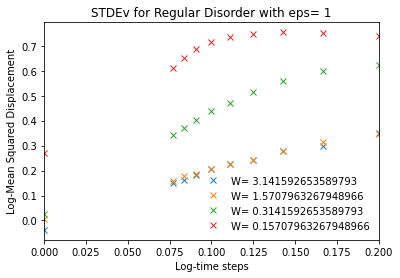

In [ ]:
%%cython
import numpy as np
from numpy import log2
import math
from math import log,pi,ceil,floor
import matplotlib.pyplot as plt
import cmath
from cmath import exp
from numpy import ones, zeros, sin, cos, array, roll, sqrt
import random
from random import uniform
import gc
from scipy import stats
from numba import jit,njit, prange,vectorize
import joblib
from joblib import Parallel, delayed
gc.collect()


def index(g, N):
    g=abs(g-N)
    if g % 2 == 1:return 0;
    if g % (2 ** 20) == 0:return 20;
    if g % (2 ** 19) == 0:return 19;
    if g % (2 ** 18) == 0:return 18;
    if g % (2 ** 17) == 0:return 17;
    if g % (2 ** 16) == 0:return 16;
    if g % (2 ** 15) == 0:return 15;
    if g % (2 ** 14) == 0:return 14;
    if g % (2 ** 13) == 0:return 13;
    if g % (2 ** 12) == 0:return 12;
    if g % (2 ** 11) == 0:return 11;
    if g % (2 ** 10) == 0:return 10;
    if g % (2 ** 9) == 0:return 9;
    if g % (2 ** 8) == 0:return 8;
    if g % (2 ** 7) == 0:return 7;
    if g % (2 ** 6) == 0:return 6;
    if g % (2 ** 5) == 0:return 5;
    if g % (2 ** 4) == 0:return 4;
    if g % (2 ** 3) == 0:return 3;
    if g % (2 ** 2) == 0:return 2;
    if g % (2) == 0:return 1;



def rotation_1(N,eps, w):
  q = [pow(eps,index(g,N))*0.25*pi for g in range(2*N+1) ]
  disorder =array([exp(1j * uniform(-w, w) * pi) for g in range(2*N+1)])
  SIN = array([a*b for a,b in zip(sin(q),disorder)])  
  SINM = array([-a*b for a,b in zip(sin(q),disorder)])
  COS =array([a*b for a,b in zip(cos(q),disorder)])
  return array([[SIN, COS], 
                  [COS, SINM]])



def qw_split_avg(eps, w):
    
    N = 10_000
    a = 1 / sqrt(2.0)
    b = 1j / sqrt(2.0)
    avg_disorder = zeros(21)
    r1 = rotation_1(N,eps, w)
    psi = np.zeros((2, 2 * N + 1), dtype=complex)
    psi[0,N] = a
    psi[1, N] = b
    std_dev = np.zeros(N + 1,dtype=float)
    positions = np.arange(-N,N+1)
    #positions_sq = [i ** 2 for i in range(-N, N + 1)]
    pow_2 = [pow(2, i) for i in range(1, 21)]
    j = 0
    for n in range(1, N + 1):
        
      psi[:,N-n:N+n+1] = np.einsum("ijk,jk->ik", r1[:,:,N-n:N+n+1], psi[:,N-n:N+n+1], optimize="optimal")  # rotation theta1
      psi[0] = roll(psi[0], 1)  # shift up
      psi[1] = roll(psi[1], -1)  # shift down
      if n == pow_2[j]:
        psi_sq = abs(psi[0, N - n : N + n + 1]) ** 2 + abs(psi[1, N - n : N + n + 1]) ** 2
        sum_0 = np.sum([(a**2)* b for a, b in zip(positions[N - n : N + n + 1], psi_sq)])
        sum_1 = np.sum([(a * b) ** 2 for a, b in zip(positions[N - n : N + n + 1], psi_sq)])
        std_dev[n] = sqrt(sum_0 - sum_1)
        j += 1
        avg_disorder[j] += std_dev[n]/50
    return avg_disorder

def qw_split(eps,w):
  with joblib.parallel_backend(backend="threading"):
      parallel = Parallel(verbose=5)
      standard_dev= np.sum(parallel([delayed(qw_split_avg)(eps, w) for k in range(50)]),axis=0)
      return standard_dev

def main():
   
    W = [pi,0.5*pi,0.1*pi, 0.05*pi]
    eps=1
    with joblib.parallel_backend(backend="threading"):
      parallel = Parallel(verbose=5)
      standard_dev= (parallel([delayed(qw_split)(eps, j) for j in W]))
    print(standard_dev)     
    for j in range(4):
      log_std=[]
      n=0
      for i in standard_dev[j]:

        if i != 0:
          n+=1
          log_std.append(log(i, 2)/n)
        if i==0:
          log_std.append(0)

      log_scale =[1/i for i in range(1,14)]
      log_scale =[0]+log_scale        
      res = np.polyfit(log_scale[10:14] ,log_std[10:14],1)
      log_std[0] = res[1]
      print("Intercept for W = "+str(W[j])+" ="+str(res[1]))
      fig2 = plt.figure(2)
      ax2 = fig2.add_subplot(111)
      plot2 = plt.figure(2)
      ax2.plot(log_scale,log_std[0:14], "x", label="W= " + str(W[j]))
      ax2.legend(loc="lower right", frameon=False)
      plt.xlabel("Log-time steps")
      plt.ylabel("Log-Mean Squared Displacement")
      plt.title("STDEv for Regular Disorder with eps= "+str(eps))
      plt.xlim(0, 0.2)
      plt.savefig(f"{round(j,2)} plot.png", dpi=600)


main()


In [2]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


The following code would generate snapshots at any time-step. To observe disorder plots switch rotation function from the codes given above. The tuning parameter eps will provide further help in observing transitions.

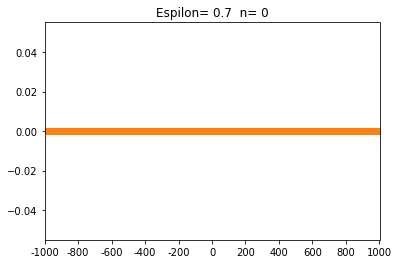

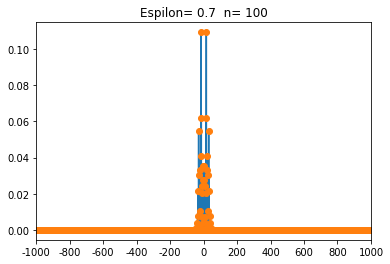

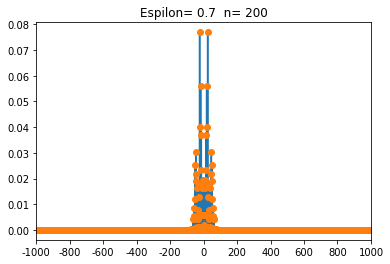

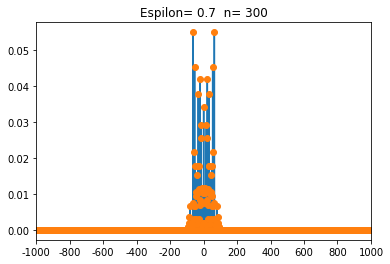

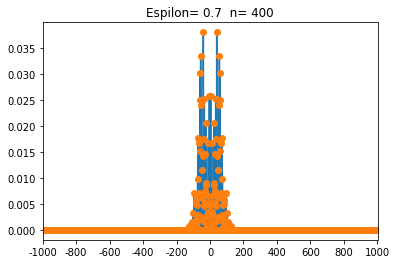

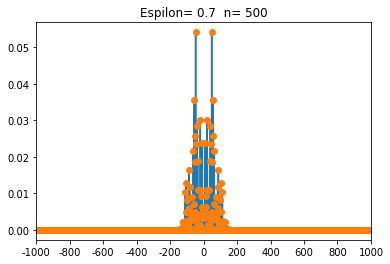

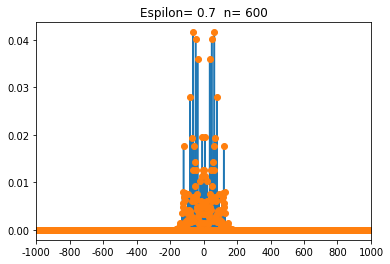

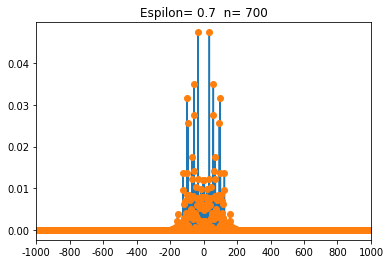

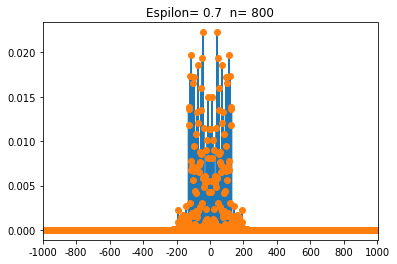

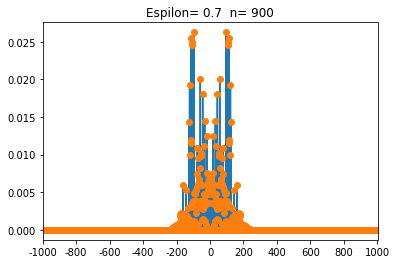

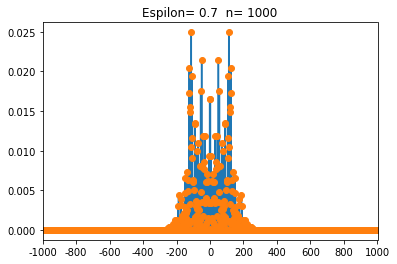

In [3]:
%%cython
import numpy as np
from numpy import log2
import math
from math import log,pi,ceil,floor
import matplotlib.pyplot as plt
import cmath
from cmath import exp
from numpy import ones, zeros, sin, cos, array, roll, sqrt
import random
from random import uniform
import gc
from scipy import stats
from numba import jit,njit, prange,vectorize
import joblib
from joblib import Parallel, delayed
gc.collect()


def index(g, N):
    g=abs(g-N)
    if g % 2 == 1:return 0;
    if g % (2 ** 20) == 0:return 20;
    if g % (2 ** 19) == 0:return 19;
    if g % (2 ** 18) == 0:return 18;
    if g % (2 ** 17) == 0:return 17;
    if g % (2 ** 16) == 0:return 16;
    if g % (2 ** 15) == 0:return 15;
    if g % (2 ** 14) == 0:return 14;
    if g % (2 ** 13) == 0:return 13;
    if g % (2 ** 12) == 0:return 12;
    if g % (2 ** 11) == 0:return 11;
    if g % (2 ** 10) == 0:return 10;
    if g % (2 ** 9) == 0:return 9;
    if g % (2 ** 8) == 0:return 8;
    if g % (2 ** 7) == 0:return 7;
    if g % (2 ** 6) == 0:return 6;
    if g % (2 ** 5) == 0:return 5;
    if g % (2 ** 4) == 0:return 4;
    if g % (2 ** 3) == 0:return 3;
    if g % (2 ** 2) == 0:return 2;
    if g % (2) == 0:return 1;



def rotation_1(N,eps):
  q = [pow(eps,index(g,N))*0.25*pi for g in range(2*N+1) ]
  return array([[sin(q), cos(q)], 
                  [cos(q), -sin(q)]])



def qw_split(eps,N):
    
    a = 1 / sqrt(2.0)
    b = 1j / sqrt(2.0)
    avg_disorder = zeros(21)
    r1 = rotation_1(N,eps)
    psi = np.zeros((2, 2 * N + 1), dtype=complex)
    psi_t = zeros((2, 2*N + 1, N+1), dtype = complex)
    psi_t[:,:,0] = psi
    psi[0,N] = a
    psi[1, N] = b

    for n in range(1, N + 1):
        
      psi[:,N-n:N+n+1] = np.einsum("ijk,jk->ik", r1[:,:,N-n:N+n+1], psi[:,N-n:N+n+1], optimize="optimal")  # rotation theta1
      psi[0] = roll(psi[0], 1)  # shift up
      psi[1] = roll(psi[1], -1)  # shift down
      psi_t[:,:,n] = psi
    return psi_t

def measure(psi):
    return abs(psi[0,:])**2 + abs(psi[1,:])**2


def main():
    N=1000
    P=2*N+1
    eps=0.7
    for n in range(0,N+1,100):
      psi_t=qw_split(eps,N)
      psi = psi_t[:,:,n]
      prob = measure(psi)
      fig1 = plt.figure(1)
      ax1 = fig1.add_subplot(111)
      plt.title("Espilon= "+str(eps)+"  n= "+str(n))
      plot1=plt.figure(1)
      ax1.plot(range(P), prob)
      ax1.plot(range(P), prob, 'o')
      loc = range (0, P, int(P / 10)) #Location of ticks
      plt.xticks(loc)
      plt.xlim(0, P)
      ax1.set_xticklabels(range (-N, N+1,int(P/10)))
      plt.show()   
   


main()
